# Import, Cleaning and Exploring the data

In [111]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

#basic externals
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import feather

#visual libs
import matplotlib.pyplot  as plt
import seaborn as sns

## testing statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

#local imports
%run xm_functions

InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

### Quickly import our feather raw dataset

In [112]:
fast =True
if fast==True:
    df = pd.read_feather('online_retail_raw.feather')
else:
    file_path = 'Online Retail.xlsx'
    df = pd.read_excel(file_path)
    for col in ['InvoiceNo', 'StockCode', 'Country', 'Description'] : 
        df[col] = df[col].astype('str')
        df.to_feather('online_retail_raw.feather')

## Quick describe

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.

In [113]:
df.describe(include='all')
df.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,541909,541909.000,541909,541909.000,406829.000,541909
unique,25900,4070,4224,nan,23260,nan,nan,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,nan,2011-10-31 14:41:00,nan,nan,United Kingdom
freq,1114,2313,2369,nan,1114,nan,nan,495478
first,NaN,NaN,NaN,nan,2010-12-01 08:26:00,nan,nan,NaN
last,NaN,NaN,NaN,nan,2011-12-09 12:50:00,nan,nan,NaN
mean,NaN,NaN,NaN,9.552,NaN,4.611,15287.691,NaN
std,NaN,NaN,NaN,218.081,NaN,96.760,1713.600,NaN
min,NaN,NaN,NaN,-80995.000,NaN,-11062.060,12346.000,NaN
25%,NaN,NaN,NaN,1.000,NaN,1.250,13953.000,NaN


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.650,17850.000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.250,17850.000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.850,17850.000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.850,17850.000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.690,13047.000,United Kingdom


In [114]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

## Drop NA customers

In [115]:
original_size = df.shape[0]
df= df.dropna()
print(original_size-df.shape[0], 'rows dropped due to missing customer ID')

135080 rows dropped due to missing customer ID


# Drop Duplicates

In [116]:
df_no_duplicates = df.drop_duplicates()
print((df.shape[0] - df_no_duplicates.shape[0]) ,"perfect duplicates deleted" )
df = df_no_duplicates

5225 perfect duplicates deleted


In [117]:
#other duplicates?

# Fix abnormal values

In [118]:
df_negative_quantity = df[df['Quantity'] <0]
print(df_negative_quantity.shape[0] ,'items with negative quantity (cancels). Dropping')
df = df.drop(df_negative_quantity.index)

print(df[df['InvoiceNo'].str.contains('c')==True].shape[0], 'canceled order left')

8872 items with negative quantity (cancels). Dropping
0 canceled order left


In [119]:
df_drop = df[df['UnitPrice'] <=0]
print(df_drop.shape[0] ,'Unitprice of 0 to drop')
df = df.drop(df_drop.index)

40 Unitprice of 0 to drop


### Drop manual transactions

In [120]:
df_drop = df[df['StockCode'] =='M']
print(df_drop.shape[0] ,'manual transactions to drop')
df = df.drop(df_drop.index)

279 manual transactions to drop


In [121]:
df.head(500).to_csv('online_retail_top_500.csv')

# Transforming data for exploration

In [122]:
def xm_month(x):
    if x.year ==2010:
        return 0
    else:
        return x.month
    
def xm_week(x):
    if x.year ==2010:
        return -52+x.week
    else:
        return x.week

In [123]:
df['Month'] = df['InvoiceDate'].apply(lambda x :xm_month(x) )
df['Week'] = df['InvoiceDate'].apply(lambda x :xm_week(x) )
df['Time'] = df['InvoiceDate'].apply(lambda x :x.hour + x.minute*0.016666 )

In [124]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [125]:
col='Description'
col_new_name = 'ItemID'
y_col = 'UnitPrice'
if col_new_name in df.columns:
    df.drop(col_new_name, axis = 1, inplace=True)
col_ordered =df[[col,y_col]].groupby(col).mean().sort_values(y_col).reset_index().reset_index().set_index(col).rename({'index':col_new_name}, axis=1)
df = df.join(col_ordered.drop(y_col , axis =1), on=col)

In [126]:
col_new_name = 'StockCode'
if col_new_name in df.columns:
    df.drop(col_new_name, axis = 1, inplace=True)

In [127]:
df.loc[df[df.Country=='EIRE'].index, 'Country'] ='Ireland'

In [128]:
df_countries_gpd = pd.read_csv('GPD per capita countries.csv', names= ['Country', 'Country_GPD'])
df = pd.merge( df, df_countries_gpd, how='left',left_on ='Country' , right_on='Country')
feature_name = 'Country_GPD' 
print(df[feature_name].isna().sum(), "null/nan values for:", feature_name)
print("Filling null", feature_name, "with mean:", round(df[feature_name].mean(), 2))
df[feature_name] = df[feature_name].fillna(round(df[feature_name].mean(), 2))


1283 null/nan values for: Country_GPD
Filling null Country_GPD with mean: 44477.59


# Exploring the data

In [131]:
def isCountry(x, country):
    if x==country:
        return True
    else:
        return False

In [132]:
df['CountryUK']= df['Country'].apply(lambda x: isCountry(x, 'United Kingdom') )

In [133]:
df.describe(include = 'all')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Week,Time,TotalPrice,ItemID,Country_GPD,CountryUK
count,392413,392413,392413.000,392413,392413.000,392413.000,392413,392413.000,392413.000,392413.000,392413.000,392413.000,392413.000,392413
unique,18468,3876,nan,17228,nan,nan,37,nan,nan,nan,nan,nan,nan,2
top,576339,WHITE HANGING HEART T-LIGHT HOLDER,nan,2011-11-14 15:27:00,nan,nan,United Kingdom,nan,nan,nan,nan,nan,nan,True
freq,542,2016,nan,542,nan,nan,348960,nan,nan,nan,nan,nan,nan,348960
first,NaN,NaN,nan,2010-12-01 08:26:00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN
last,NaN,NaN,nan,2011-12-09 12:50:00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN
mean,NaN,NaN,13.111,NaN,3.001,15287.749,NaN,6.818,27.522,13.228,22.511,1921.992,44477.591,NaN
std,NaN,NaN,180.518,NaN,15.046,1713.420,NaN,3.682,16.095,2.260,310.780,1042.693,4784.577,NaN
min,NaN,NaN,1.000,NaN,0.001,12346.000,NaN,0.000,-4.000,6.333,0.001,0.000,15500.000,NaN
25%,NaN,NaN,2.000,NaN,1.250,13955.000,NaN,4.000,14.000,11.683,4.950,1101.000,43620.000,NaN


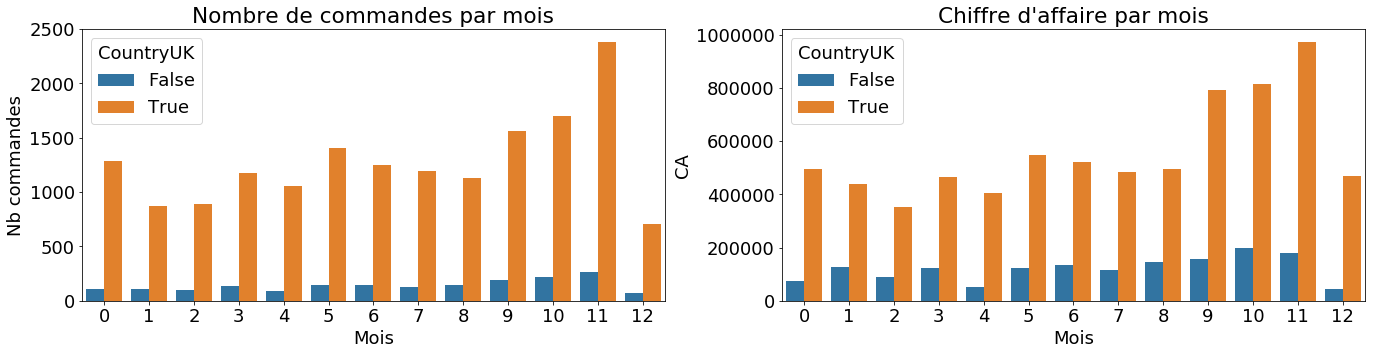

In [134]:
plt.rcParams["figure.figsize"] = (23,5)
f, axes = plt.subplots(1, 2)

df_plot = df.groupby(['Month', 'CountryUK'] ).InvoiceNo.nunique().reset_index()
ax = sns.barplot(x="Month", y="InvoiceNo", hue="CountryUK", data=df_plot, ax=axes[0])
legend(ax, 'Nombre de commandes par mois', 'Mois', 'Nb commandes')

#df_plot = df.groupby(['Month', 'CountryUK'] ).Quantity.sum().reset_index()
#ax = sns.barplot(x="Month", y="Quantity", hue="CountryUK", data=df_plot, ax=axes[1])
#silent = ax.set_title('Number of articles sold per month')
#
df_plot = df.groupby(['Month', 'CountryUK'] ).TotalPrice.sum().reset_index()
ax = sns.barplot(x="Month", y="TotalPrice", hue="CountryUK", data=df_plot, ax=axes[1])
legend(ax, 'Chiffre d\'affaire par mois', 'Mois', 'CA')

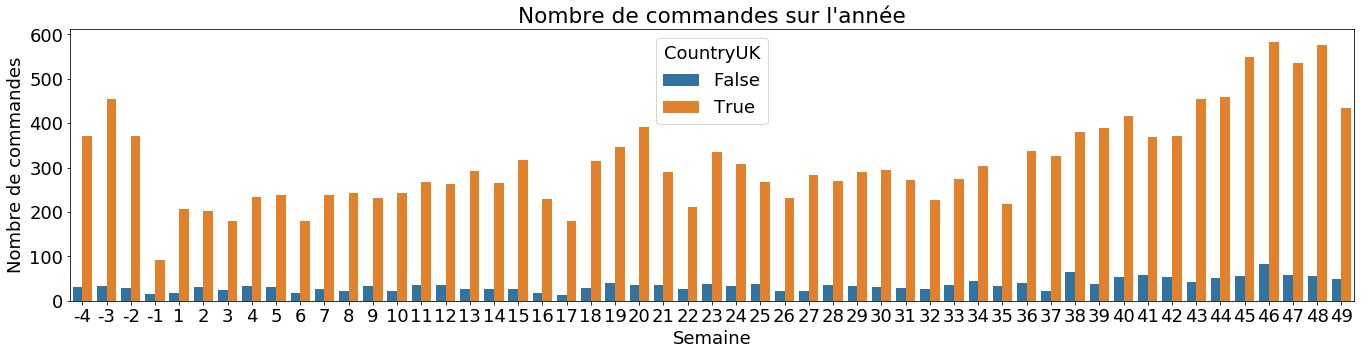

In [135]:
plt.rcParams["figure.figsize"] = (23,5)
f, axes = plt.subplots(1, 1)

df_plot = df.groupby(['Week', 'CountryUK'] ).InvoiceNo.nunique().reset_index()
ax = sns.barplot(x="Week", y="InvoiceNo", hue="CountryUK", data=df_plot, ax=axes)
silent = ax.set_title('Number of Invoices per Week')
legend(plt, 'Nombre de commandes sur l\'année', 'Semaine', 'Nombre de commandes')

In [136]:
col='CustomerID'
col_new_name = 'Client'
y_col = 'TotalPrice'
if col_new_name in df.columns:
    df.drop(col_new_name, axis = 1, inplace=True)
col_ordered =df[[col,y_col]].groupby(col).sum().sort_values(y_col).reset_index().reset_index().set_index(col).rename({'index':col_new_name}, axis=1)
df = df.join(col_ordered.drop(y_col , axis =1), on=col)

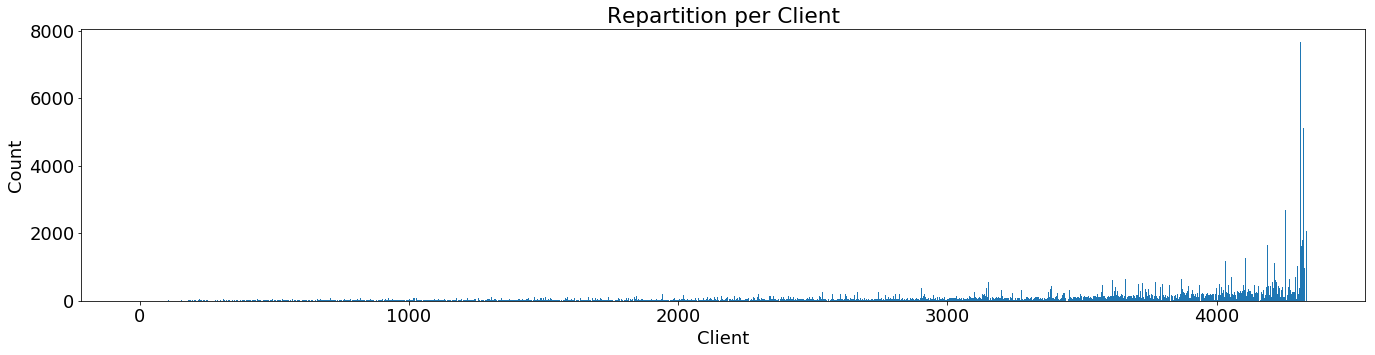

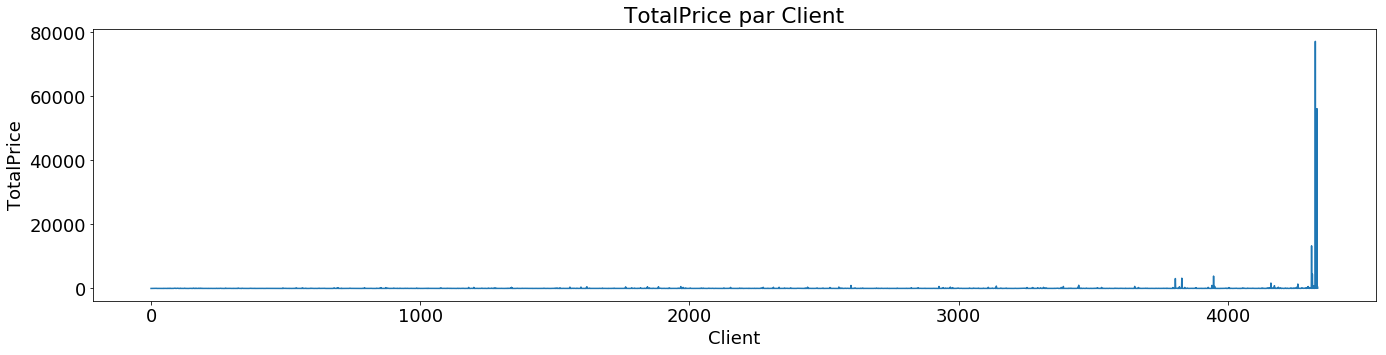

In [137]:
plot_rep_stats(df, 'Client', 'TotalPrice',  show_distrib=True)

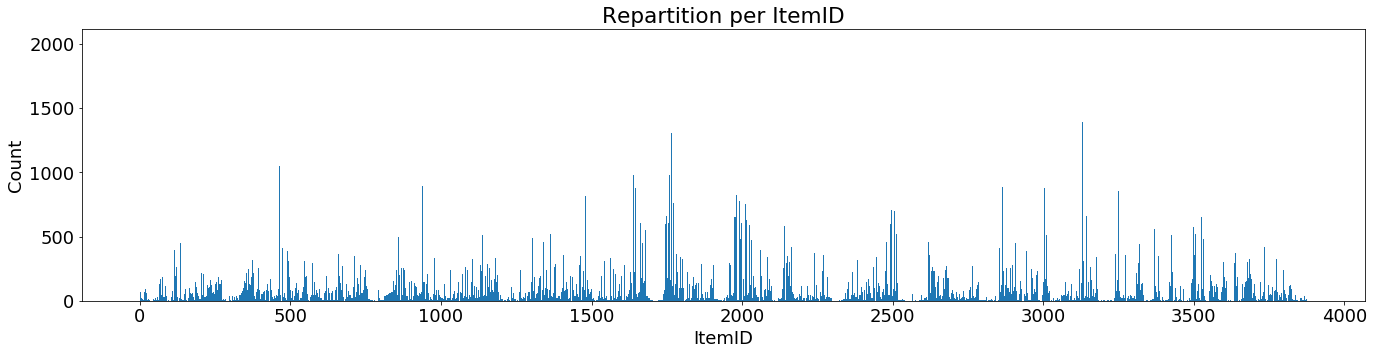

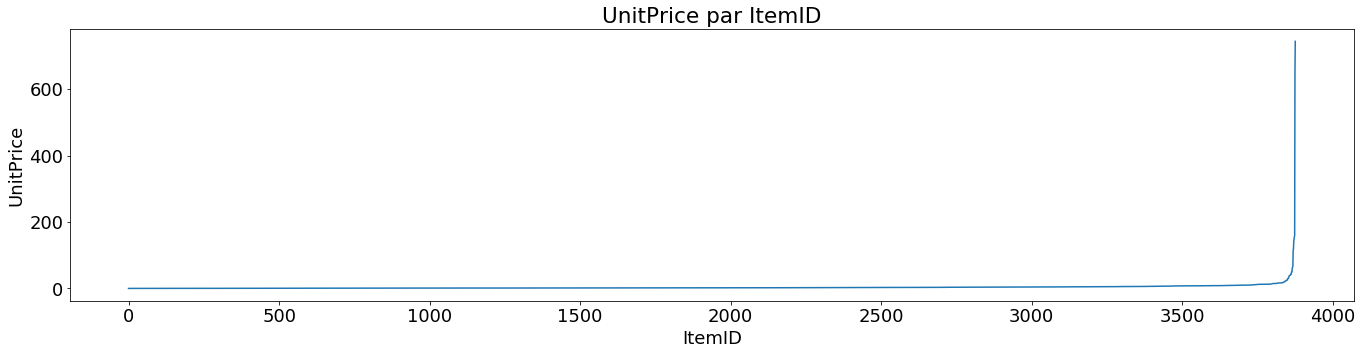

In [138]:
plot_rep_stats(df, 'ItemID', 'UnitPrice',  show_distrib=True)

# Export

In [139]:
df.reset_index().to_feather('online_retail_clean.feather')